<a href="https://colab.research.google.com/github/IfeoluwaChristy19/CodeAlpha_project_Olosunde-Ifeoluwa-C/blob/main/Iris_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas

In [3]:
pip install matplotlib

In [4]:
pip install seaborn

In [5]:
import numpy as np
import pandas as pd

In [6]:
!pip install matplotlib-venn

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
Iris = pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [10]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
Iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


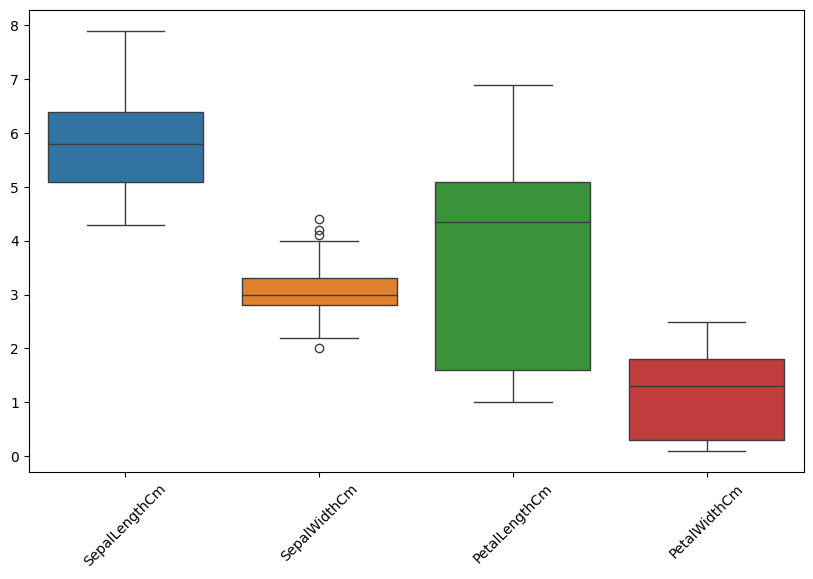

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Iris.iloc[:, 1:-1])  # Exclude ID and target column
plt.xticks(rotation=45)
plt.show()

In [16]:

# Define the column to check for outliers
column = 'SepalWidthCm'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Iris[column].quantile(0.25)
Q3 = Iris[column].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Iris[(Iris[column] < lower_bound) | (Iris[column] > upper_bound)]
("Number of outliers:", len(outliers))
(outliers)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


handling outliers, replacing them with median value

In [17]:
median_value = Iris[column].median()
Iris[column] = np.where((Iris[column] < lower_bound) | (Iris[column] > upper_bound), median_value, Iris[column])

checking after handling outliers

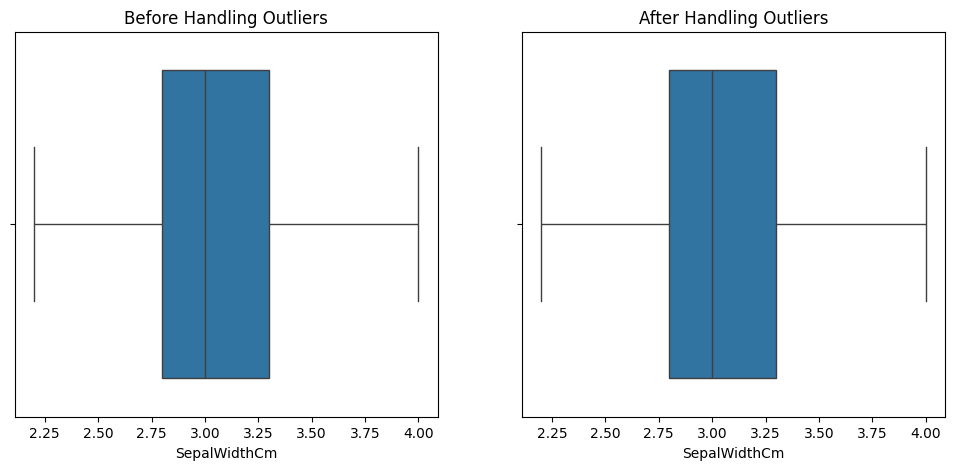

In [18]:
Iris_cleaned = Iris.copy()
plt.figure(figsize=(12, 5))

# Before
plt.subplot(1, 2, 1)
sns.boxplot(x=Iris["SepalWidthCm"])
plt.title("Before Handling Outliers")

# After
plt.subplot(1, 2, 2)
sns.boxplot(x=Iris_cleaned["SepalWidthCm"])
plt.title("After Handling Outliers")

plt.show()

comparing with histogram

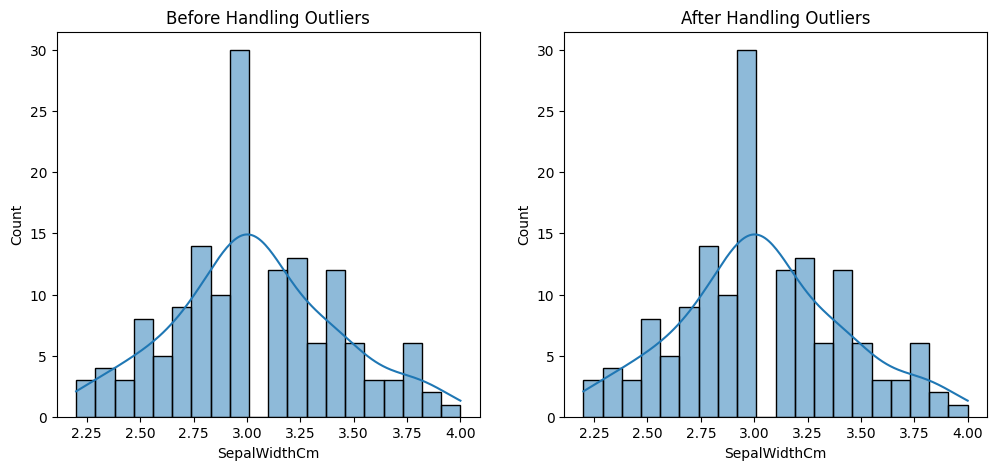

In [19]:
plt.figure(figsize=(12, 5))

# Histogram before handling outliers
plt.subplot(1, 2, 1)
sns.histplot(Iris["SepalWidthCm"], bins=20, kde=True)
plt.title("Before Handling Outliers")

# Histogram after handling outliers
plt.subplot(1, 2, 2)
sns.histplot(Iris_cleaned["SepalWidthCm"], bins=20, kde=True)
plt.title("After Handling Outliers")

plt.show()

we'll divide into x and y

In [20]:
# 'Iris' is your DataFrame
X = Iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y = Iris['Species']  # Target

Since the "Species" column is categorical value (string), we'll convert it into numeric values:

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Iris['Species'] = encoder.fit_transform(Iris['Species'])  # Encode species as numbers

In [22]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Normalising the data using the MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
#Split the dataset into training and testing sets (80-20 split)

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

("Training set size:", X_train.shape)
("Testing set size:", X_test.shape)

('Testing set size:', (30, 4))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

At this point we have a well-preprocessed Iris dataset that can be used for further analysis or modeling tasks